Task 1: This is an open ended problem. Apply Exploratory Data Analysis (Univariate and Bivariate) on the dataset available above.


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('dataset.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
df.shape

(112634, 17)

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [ ]:
df.rename(columns={'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility':'CAFV_Eligibility'}, inplace=True)
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility',
       'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
VIN_(1-10),0
County,0
City,0
State,0
Postal_Code,0
Model_Year,0
Make,0
Model,20
Electric_Vehicle_Type,0
CAFV_Eligibility,0


In [ ]:
df_dropna = df.dropna()

df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN_(1-10)             112152 non-null  object 
 1   County                 112152 non-null  object 
 2   City                   112152 non-null  object 
 3   State                  112152 non-null  object 
 4   Postal_Code            112152 non-null  int64  
 5   Model_Year             112152 non-null  int64  
 6   Make                   112152 non-null  object 
 7   Model                  112152 non-null  object 
 8   Electric_Vehicle_Type  112152 non-null  object 
 9   CAFV_Eligibility       112152 non-null  object 
 10  Electric_Range         112152 non-null  int64  
 11  Base_MSRP              112152 non-null  int64  
 12  Legislative_District   112152 non-null  float64
 13  DOL_Vehicle_ID         112152 non-null  int64  
 14  Vehicle_Location       112152 non-null  o

Univariate Analysis - Statistical Non Visual Analysis

In [ ]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [ ]:
discrete_univariate_analysis(discrete_df)

********** VIN_(1-10) **********
count                                                 112634
nunique                                                 7548
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN_(1-10), dtype: object
Value Counts: 
 VIN_(1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

********** County **********
count                                                 112634
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
Value Counts: 
 County
King          59000
Snohomish     12434
Pierce         8535
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth        1
Kings             1
Kootenai          1
Nam

In [ ]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [ ]:
numerical_univariate_analysis(numerical_df)

********** Postal_Code **********
min        1730.000000
max       99701.000000
mean      98156.226850
median    98119.000000
std        2648.733064
Name: Postal_Code, dtype: float64

********** Model_Year **********
min       1997.000000
max       2023.000000
mean      2019.003365
median    2020.000000
std          2.892364
Name: Model_Year, dtype: float64

********** Electric_Range **********
min         0.000000
max       337.000000
mean       87.812987
median     32.000000
std       102.334216
Name: Electric_Range, dtype: float64

********** Base_MSRP **********
min            0.000000
max       845000.000000
mean        1793.439681
median         0.000000
std        10783.753486
Name: Base_MSRP, dtype: float64

********** Legislative_District **********
min        1.000000
max       49.000000
mean      29.805604
median    34.000000
std       14.700545
Name: Legislative_District, dtype: float64

********** DOL_Vehicle_ID **********
min       4.777000e+03
max       4.792548e+08
mean

Univariate - Visual Analysis

In [ ]:
df.shape

(112634, 17)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

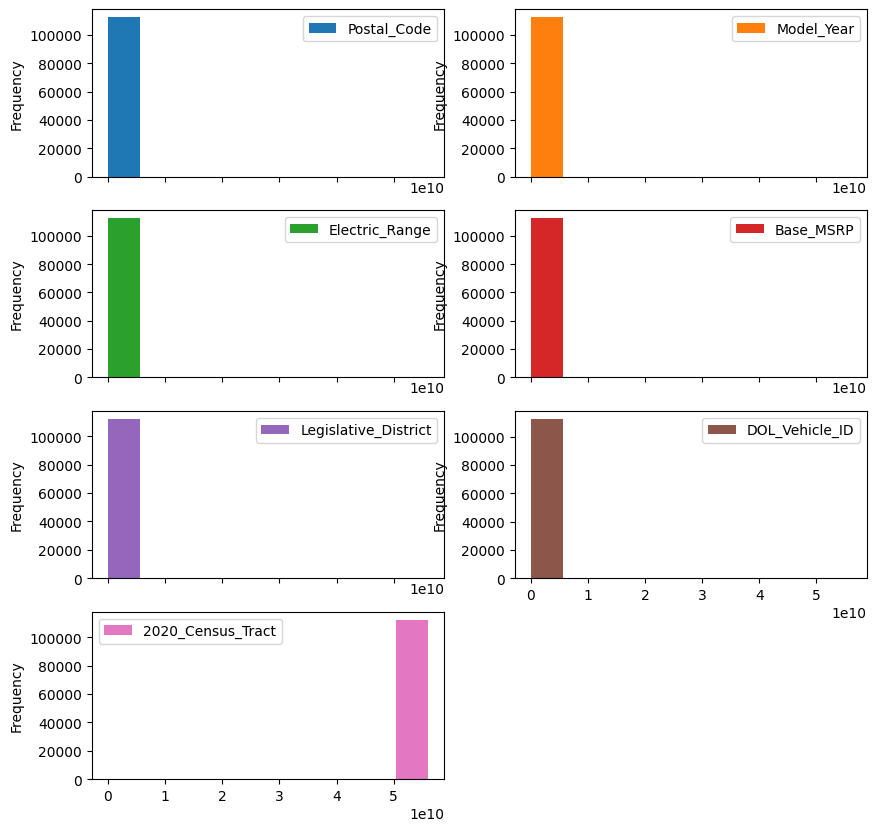

In [ ]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

,0
Postal_Code,"Axes(0.125,0.712609;0.352273x0.167391)"
Model_Year,"Axes(0.547727,0.712609;0.352273x0.167391)"
Electric_Range,"Axes(0.125,0.511739;0.352273x0.167391)"
Base_MSRP,"Axes(0.547727,0.511739;0.352273x0.167391)"
Legislative_District,"Axes(0.125,0.31087;0.352273x0.167391)"
DOL_Vehicle_ID,"Axes(0.547727,0.31087;0.352273x0.167391)"
2020_Census_Tract,"Axes(0.125,0.11;0.352273x0.167391)"


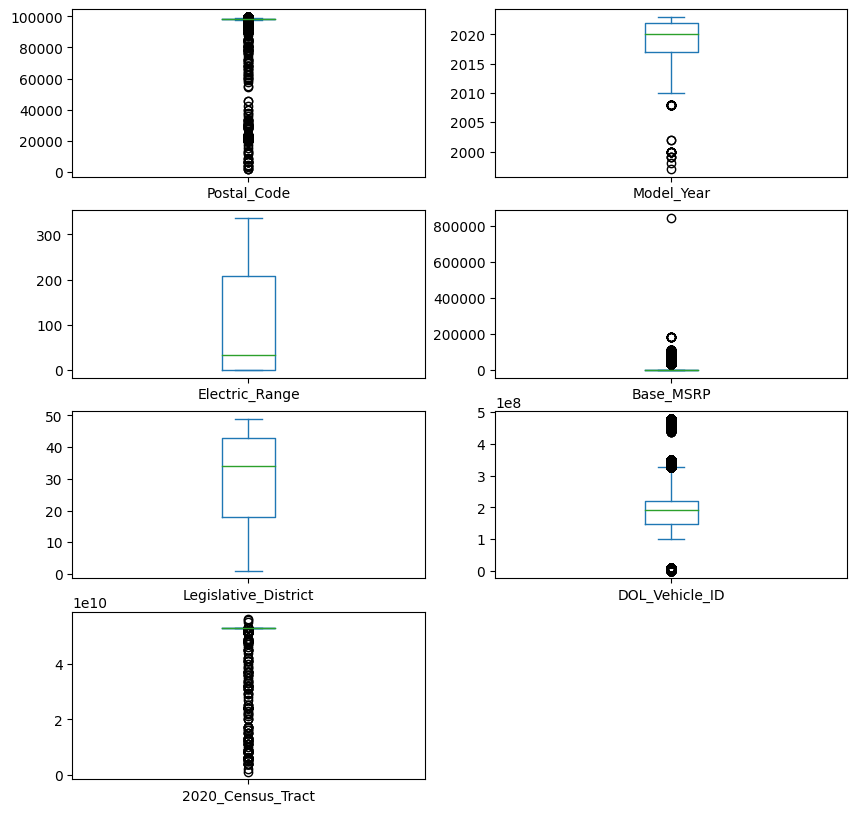

In [ ]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

Bivariate Analysis
a. Continuous vs Continuous Numerical Data

In [ ]:
numerical_df.corr()

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,2020_Census_Tract
Postal_Code,1.000000,-0.004485,0.000385,0.001151,-0.433405,0.003365,0.501170
Model_Year,-0.004485,1.000000,-0.288433,-0.229130,0.010439,-0.068295,0.000714
Electric_Range,0.000385,-0.288433,1.000000,0.085025,0.024387,0.009682,0.000722
Base_MSRP,0.001151,-0.229130,0.085025,1.000000,0.012426,0.000504,0.000979
Legislative_District,-0.433405,0.010439,0.024387,0.012426,1.000000,-0.001671,-0.111991
DOL_Vehicle_ID,0.003365,-0.068295,0.009682,0.000504,-0.001671,1.000000,0.002754
2020_Census_Tract,0.501170,0.000714,0.000722,0.000979,-0.111991,0.002754,1.000000


<Axes: xlabel='Model_Year', ylabel='Electric_Range'>

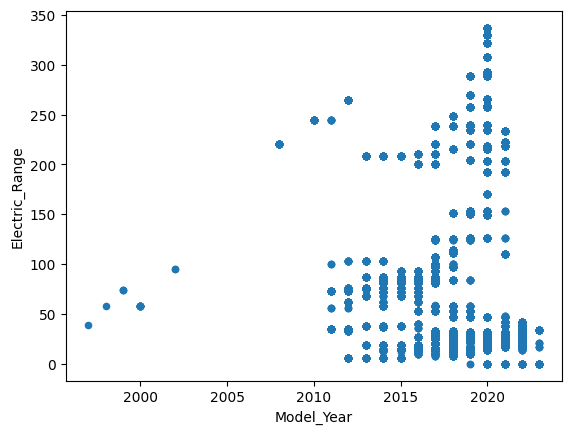

In [ ]:
df.plot(kind='scatter', x='Model_Year',y='Electric_Range')

<Axes: xlabel='Model_Year', ylabel='Base_MSRP'>

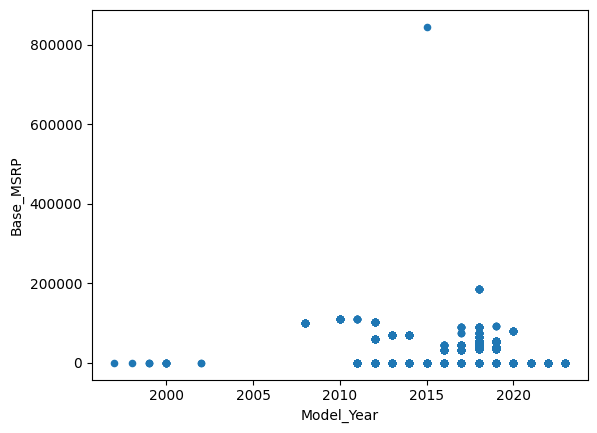

In [ ]:
df.plot(kind='scatter', x='Model_Year',y='Base_MSRP')

<Axes: xlabel='Model_Year', ylabel='Base_MSRP'>

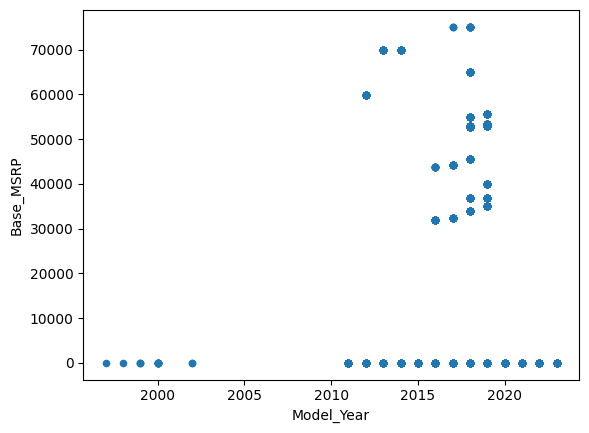

In [ ]:
df = df.loc[(df['Base_MSRP'] < 80000)]

df.plot(kind='scatter', x='Model_Year',y='Base_MSRP')

Discrete vs Discrete Data

In [ ]:
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility',
       'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [ ]:
pd.crosstab(df['Electric_Utility'],df['Electric_Vehicle_Type'])

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Electric_Utility,,
AVISTA CORP,151,84
"BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC",21,11
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY,1150,525
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||PUD NO 1 OF ASOTIN COUNTY,28,17
BONNEVILLE POWER ADMINISTRATION||BENTON RURAL ELECTRIC ASSN,0,3
...,...,...
PUD NO 1 OF WHATCOM COUNTY,22,13
PUD NO 2 OF GRANT COUNTY,226,108
PUGET SOUND ENERGY INC,16695,5457


In [ ]:
pd.crosstab(df['Model_Year'],df['Electric_Vehicle_Type'])

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model_Year,,
1997,1,0
1998,1,0
1999,3,0
2000,10,0
2002,2,0
2011,762,71
2012,814,871
2013,3018,1673
2014,1864,1821


In [ ]:
pd.crosstab(df['CAFV_Eligibility'],df['Electric_Vehicle_Type'])

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
CAFV_Eligibility,,
Clean Alternative Fuel Vehicle Eligible,46745,11820
Eligibility unknown as battery range has not been researched,39236,0
Not eligible due to low battery range,9,14688


In [ ]:
pd.crosstab(df['Model_Year'],df['CAFV_Eligibility'])

CAFV_Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
Model_Year,,,
1997,1,0,0
1998,1,0,0
1999,3,0,0
2000,10,0,0
2002,2,0,0
2011,833,0,0
2012,1310,0,375
2013,3836,0,855
2014,2896,0,789


<Axes: xlabel='CAFV_Eligibility'>

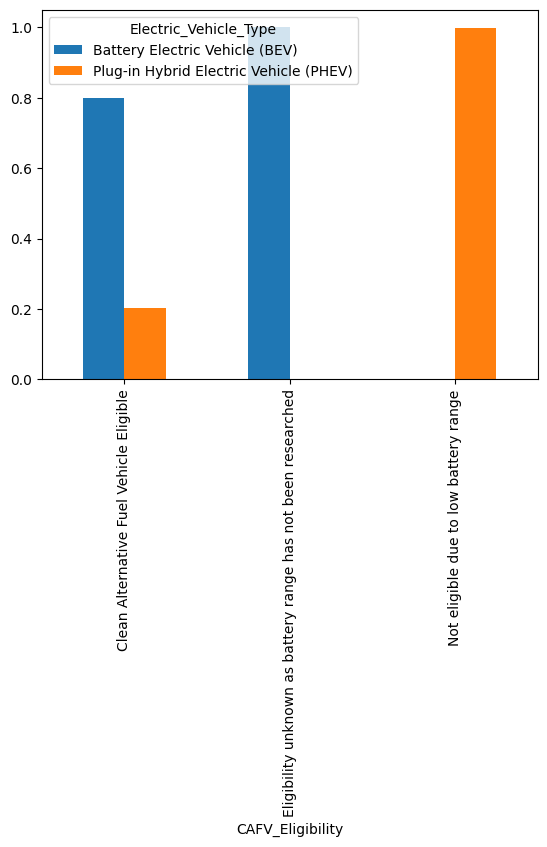

In [ ]:
tab = pd.crosstab(df['CAFV_Eligibility'], df['Electric_Vehicle_Type'], normalize='index')

tab.plot(kind='bar')

<Axes: xlabel='Model_Year'>

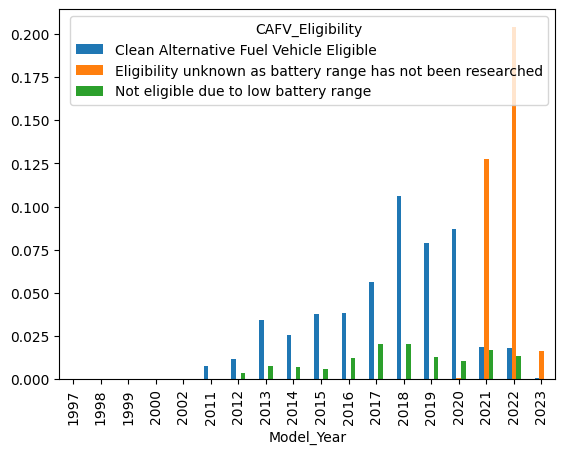

In [ ]:
tab = pd.crosstab(df['Model_Year'],df['CAFV_Eligibility'], normalize= True)

tab.plot(kind='bar')

. Continuous Numerical vs Discrete Data

In [ ]:
group = df.groupby('Electric_Vehicle_Type')
group['Electric_Range'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Electric_Vehicle_Type,,,,
Battery Electric Vehicle (BEV),0,337,105.288673,76.0
Plug-in Hybrid Electric Vehicle (PHEV),6,153,31.038705,25.0


In [ ]:
group = df.groupby('CAFV_Eligibility')
group['Electric_Range'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
CAFV_Eligibility,,,,
Clean Alternative Fuel Vehicle Eligible,30,337,163.777171,208.0
Eligibility unknown as battery range has not been researched,0,0,0.000000,0.0
Not eligible due to low battery range,6,29,19.387426,19.0


<Axes: title={'center': 'Electric_Range'}, xlabel='Electric_Vehicle_Type'>

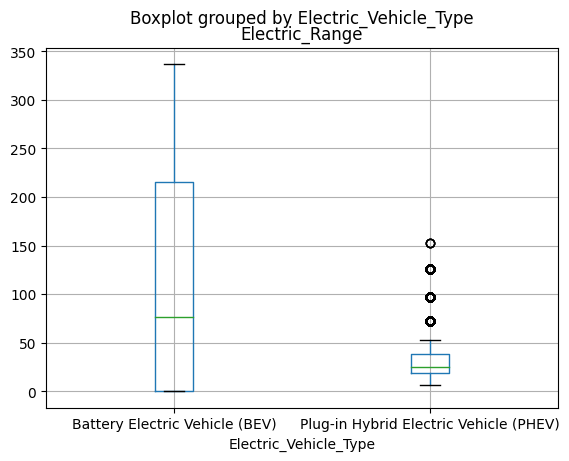

In [ ]:
df.boxplot(by="Electric_Vehicle_Type",column=['Electric_Range'])

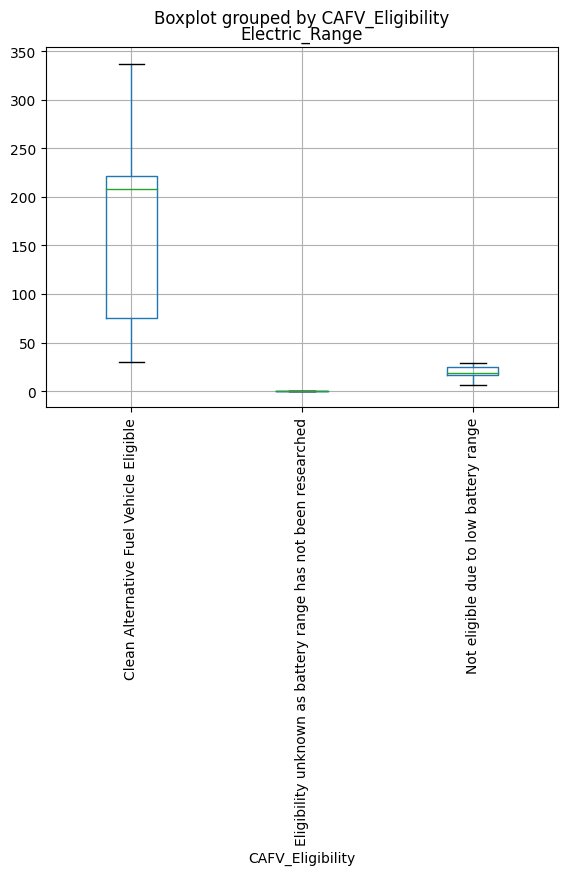

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df.boxplot(by="CAFV_Eligibility", column=['Electric_Range'])

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()



Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location

In [ ]:
! pip install plotly

In [ ]:
import plotly.express as px


In [ ]:
ev_count_by_state = df.groupby('State').size().reset_index(name='Number_of_EV_Vehicles')
ev_count_by_state


,State,Number_of_EV_Vehicles
0,AK,1
1,AL,1
2,AR,4
3,AZ,6
4,CA,76
5,CO,9
6,CT,6
7,DC,6
8,DE,1
9,FL,6


In [ ]:
fig = px.choropleth(ev_count_by_state,
                    locations='State',
                    locationmode="USA-states",
                    color='Number_of_EV_Vehicles',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    labels={'Number_of_EV_Vehicles': 'EV Vehicles'},
                    title='Number of EV Vehicles by State')

# Show the map
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Filter your DataFrame for a single state (e.g., Washington)
state_data = ev_count_by_pincode[ev_count_by_pincode['State'] == 'WA']

# Create a choropleth map showing EV vehicles by ZIP code
fig = px.choropleth_mapbox(state_data,
                           geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json",  # Washington state ZIP code geojson
                           locations='Postal_Code',
                           color='Number_of_EV_Vehicles',
                           featureidkey="properties.ZCTA5CE10",  # Make sure this matches the ZIP code field in the geojson
                           mapbox_style="carto-positron",
                           zoom=5,  # Adjust zoom level for better view of the state
                           center={"lat": 47.7511, "lon": -120.7401},  # Centering on Washington
                           title="Number of EV Vehicles by ZIP Code in Washington",
                           color_continuous_scale="Viridis",
                           hover_data=['Number_of_EV_Vehicles']  # Hover info
                          )

# Show the map
fig.show()


In [ ]:
df_wa = df[df['State'] == 'WA']

# Group by 'Postal Code' and 'Model Year' to count the number of EV vehicles per ZIP code and year
ev_count_by_zip_animated = df_wa.groupby(['Postal_Code', 'Model_Year']).size().reset_index(name='Number_of_EV_Vehicles')


In [ ]:
fig = px.choropleth_mapbox(ev_count_by_zip_animated,
                           geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json",  # GeoJSON for Washington ZIP codes
                           locations='Postal_Code',
                           color='Number_of_EV_Vehicles',
                           featureidkey="properties.ZCTA5CE10",  # Make sure this matches the ZIP code field in the geojson
                           mapbox_style="carto-positron",
                           zoom=7,  # Adjust zoom level
                           center={"lat": 47.7511, "lon": -120.7401},  # Centered on Washington state
                           animation_frame='Model_Year',  # Add the time column for animation
                           title="Number of EV Vehicles by ZIP Code over Time",
                           color_continuous_scale="Viridis",
                           hover_data=['Postal_Code', 'Number_of_EV_Vehicles']
                          )

# Show the map
fig.show()

 # Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.


In [ ]:
ev_make_by_year = df.groupby(['Make', 'Model_Year']).size().reset_index(name='Number_of_Vehicles')

# Display the resulting DataFrame for verification
print(ev_make_by_year)

      Make  Model_Year  Number_of_Vehicles
0     AUDI        2016                 214
1     AUDI        2017                 187
2     AUDI        2018                 174
3     AUDI        2019                 392
4     AUDI        2020                 224
..     ...         ...                 ...
200  VOLVO        2019                 190
201  VOLVO        2020                 162
202  VOLVO        2021                 580
203  VOLVO        2022                 882
204  VOLVO        2023                  21

[205 rows x 3 columns]


In [ ]:
import plotly.express as px

# Create the animated racing bar plot with annotations
fig = px.bar(ev_make_by_year,
             y='Make',  # Place Make on y-axis
             x='Number_of_Vehicles',  # Place the count of EV vehicles on the x-axis
             color='Make',  # Color each make differently
             animation_frame='Model_Year',  # Create animation by year
             orientation='h',  # Horizontal bar chart
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

# Update traces for displaying values
fig.update_traces(texttemplate='%{x}',  # Display the actual x-axis values (Number_of_Vehicles)
                  textposition='outside',  # Place the text outside the bars
                  textfont_size=16)  # Adjust the font size for better readability

# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  # Show grid for better visibility
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,  # Hide legend as it's not necessary for this chart
    title_x=0.5,  # Center title
    title_font=dict(size=20),  # Increase title font size
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
    width=800,  # Set a fixed width
    height=600  # Set a fixed height
)

# Show the plot
fig.show()
